In [255]:
import glob
from scipy.signal import savgol_filter, find_peaks, find_peaks_cwt
import numpy as np

from voltammetry import preprocessing, plotting, fitting

data/20mM_HO_TEMPO_1M_KOH_positive.DTA.txt


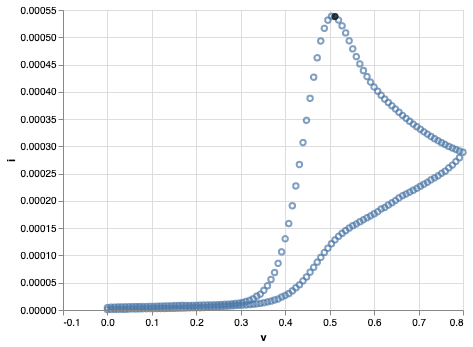

data/10mM_F4CA_pH_14_1M_KOH_50mVs.DTA


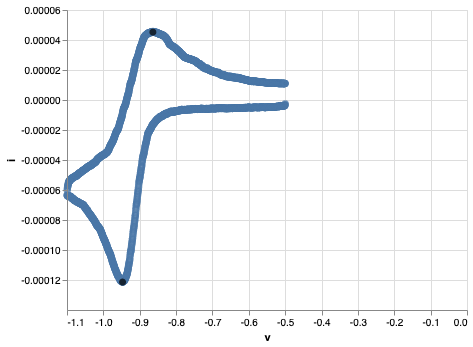

data/10mM_F4CA_pH_14_1M_KOH.DTA


data/20mM_DFCA_1M_KOH_500mVs_0.5step.DTA.txt


data/10mM_F2CA_1M_KOH_pH_14_100mV.DTA


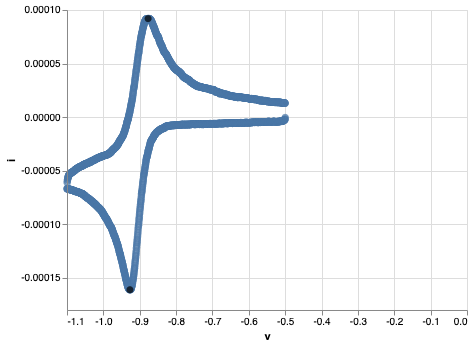

data/10mM_F4CA_pH_14_1M_KOH_100cycles.DTA


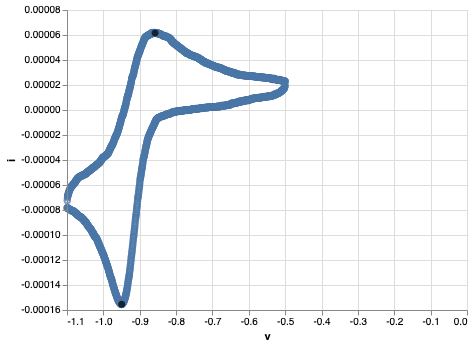

data/5mM_1,2_Sodium_NQ_4_S_0.5M_NaCl_500mV.DTA.txt


data/10mM_F1CA_1M_KOH_pH_14_3.DTA


data/20mM_DFCA_1M_KOH_100mVs_0.5step.DTA.txt


data/20MM_2,7-AQDS_1M_KOH_500mVs_0.5step_2.DTA.txt


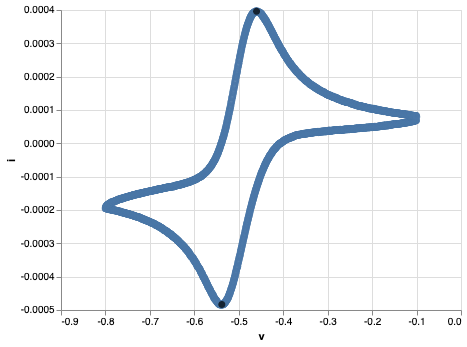

data/10mM_9fluorenone_1_2_ChCl_EG.DTA


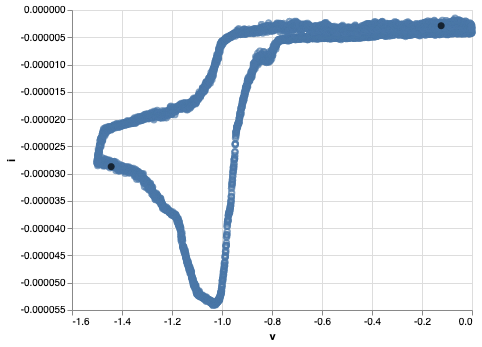

data/20MM_2,7-AQDS_1M_H2SO4_250mVs_0.5step.DTA.txt


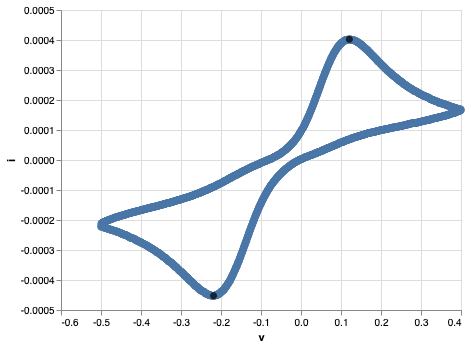

data/5mM_1,2_Sodium_NQ_4_S_1M_KOH.DTA.txt


data/20MM_2,7-AQDS_1M_KOH_100mVs_0.5step_2.DTA.txt


data/10mM_F2CA_1M_KOH_pH_14_50mV.DTA


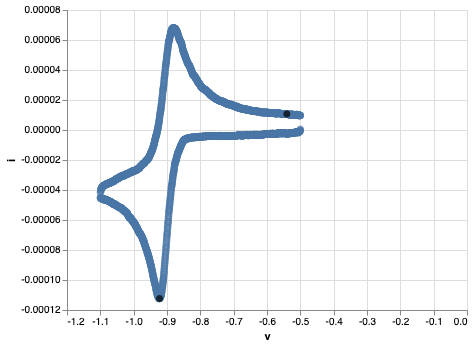

data/10mM_F2CA_1M_KOH_pH_14_unkown_peak.DTA


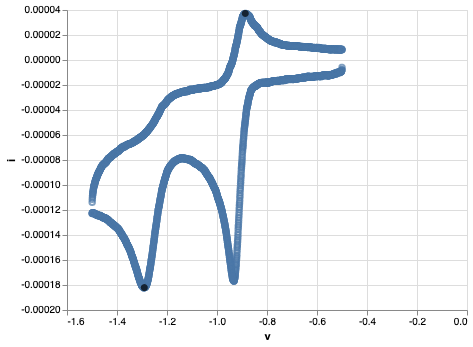

In [266]:
data_dir = 'data/*.DTA*'
n=0
for filename in glob.iglob(data_dir):
    if n<= 15:
        t,i,v = preprocessing.readFile(filename,type='gamry',scan='last')
        length = len(t)
        v1, v2 = v[0:int(length/2)], v[int(length/2):]
        i1, i2 = i[0:int(length/2)], i[int(length/2):]
        t1, t2 = t[0:int(length/2)], t[int(length/2):]

        peak_list = []
        
        sm_i1 = savgol_filter(abs(i1), 23, 3, mode='nearest')    
        index = find_peaks(sm_i1,width=15)[0]
        if len(index) > 0:
            peak_index = index[-1]
            peak_list.append([i1[peak_index],v1[peak_index]])
        
        
        sm_i2 = savgol_filter(abs(i2), 23, 3, mode='nearest')  
        index = find_peaks(sm_i2,width=15)[0]
        if len(index) > 0:
            peak_index = index[-1]
            peak_list.append([i2[peak_index],v2[peak_index]])

        print(filename)
        plotting.plot_voltammogram(t,i,v, peaks = peak_list).display()
        
    n+=1


In [256]:
find_peaks_cwt(sm_i2,np.arange(1,10))

array([  58,  139,  140,  160,  195,  239,  264,  299,  330,  355,  387,
        428,  467,  495,  516,  540,  556,  563,  592,  593,  613,  636,
        667,  691,  702,  716,  718,  735,  757,  776,  793,  810,  830,
        848,  868,  894,  917,  918,  925,  952,  982, 1010, 1031, 1056,
       1107, 1141, 1196])

In [242]:
len(i2)

1200

In [180]:
import pandas as pd
pd.DataFrame(peak_list)

0         1
0 -0.000155 -0.949712
1  0.000030 -0.649795

In [175]:
peaks_v

[-0.950738, -0.857774]